In [14]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

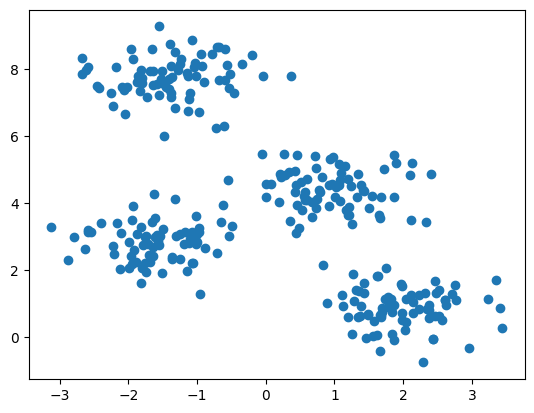

In [6]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1]);

In [11]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)

c:\Users\MSIS\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [12]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]]
[2 1 0 1 2 2 3 0 1 1 3 1 0 1 2 0 0 2 3 3 2 2 0 3 3 0 2 0 3 0 1 1 0 1 1 1 1
 1 3 2 0 3 0 0 3 3 1 3 1 2 3 2 1 2 2 3 1 3 1 2 1 0 1 3 3 3 1 2 1 3 0 3 1 3
 3 1 3 0 2 1 2 0 2 2 1 0 2 0 1 1 0 2 1 3 3 0 2 2 0 3 1 2 1 2 0 2 2 0 1 0 3
 3 2 1 2 0 1 2 2 0 3 2 3 2 2 2 2 3 2 3 1 3 3 2 1 3 3 1 0 1 1 3 0 3 0 3 1 0
 1 1 1 0 1 0 2 3 1 3 2 0 1 0 0 2 0 3 3 0 2 0 0 1 2 0 3 1 2 2 0 3 2 0 3 3 0
 0 0 0 2 1 0 3 0 0 3 3 3 0 3 1 0 3 2 3 0 1 3 1 0 1 0 3 0 0 1 3 3 2 2 0 1 2
 2 3 2 3 0 1 1 0 0 1 0 2 3 0 2 3 1 3 2 0 2 1 1 1 1 3 3 1 0 3 2 0 3 3 3 2 2
 1 0 0 3 2 1 3 0 1 0 2 2 3 3 0 2 2 2 0 1 1 2 2 0 2 2 2 1 3 1 0 2 2 1 1 1 2
 2 0 1 3]


KMEANS FROM SCRATCH

In [17]:
rnd = np.random.RandomState(42)
record_count = X.shape[0]
print(f"record count is {record_count}")
all_indices=rnd.permutation(record_count)
all_indices

record count is 300


array([203, 266, 152,   9, 233, 226, 196, 109,   5, 175, 237,  57, 218,
        45, 182, 221, 289, 211, 148, 165,  78, 113, 249, 250, 104,  42,
       281, 295, 157, 238,  17, 164,  33,  24, 215, 119,   7,  90,  46,
        73,  93,  76, 286,  60,  77,  63, 234, 229, 111, 231, 180, 144,
       239,  75, 297, 278,  97,  92, 192,  25, 232,  59,   6, 185, 173,
        30,  22, 256,  56, 186, 108, 126, 230, 193, 129, 282,  82,  84,
        66, 288, 163, 154,  19, 124,  79, 114, 118,  72,  15,  10, 194,
       101,  68, 224,  37,  16, 179, 147, 274,  67, 228,  69,  31, 183,
       265, 225, 140,  18, 181,  96, 132, 262,  86, 248, 245, 116, 146,
       292, 197, 206,  55, 172, 184, 167, 139, 253,  38, 125, 195, 283,
       137, 112, 168, 117, 277, 271, 155, 176, 178,   2, 115, 143, 177,
       120, 210, 260, 127,  74,  29,  83, 269, 107, 223, 158, 280, 246,
       222,  65, 198,  85, 213, 159,  12,  35,  28, 142, 284, 254, 170,
        51,  95, 208, 247,  41,  89, 244, 136,  26, 293, 141, 20

In [27]:
clusters_count=X[all_indices[:4]]
clusters_count

array([[-1.80701134,  2.06773859],
       [ 1.4949318 ,  3.85848832],
       [-0.60133739,  6.29994922],
       [-0.71109961,  8.66043846]])

In [62]:
def get_random_centroids(X, clusters_count):
    rnd = np.random.RandomState(42)
    record_count = X.shape[0]
    permutations = rnd.permutation(record_count)
    random_centroids_idx = permutations[:clusters_count]
    return X[random_centroids_idx]

In [63]:
num_clusters=4
centroids = get_random_centroids(X,4)
centroids

array([[-1.80701134,  2.06773859],
       [ 1.4949318 ,  3.85848832],
       [-0.60133739,  6.29994922],
       [-0.71109961,  8.66043846]])

In [64]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics import pairwise_distances_argmin

In [65]:
blob_centroid_dists = pairwise_distances(X , centroids)
blob_centroid_dists

array([[2.64475855, 1.84358095, 4.40498388, 6.70520522],
       [5.35634748, 4.59025646, 1.37522411, 1.43461742],
       [4.23875818, 1.28678433, 2.12750139, 4.0202685 ],
       ...,
       [3.33713735, 1.25456703, 2.04793782, 4.28185545],
       [6.12323723, 4.09049147, 1.77933415, 1.38686325],
       [0.68210773, 3.46840534, 3.74444601, 6.00869115]])

In [66]:
np.argmin(blob_centroid_dists, axis=1)

array([1, 2, 1, 3, 1, 1, 0, 1, 3, 3, 0, 3, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 2, 1, 1, 0, 1, 3, 2, 1, 2, 3, 3, 3, 3, 0, 1, 1, 0, 2, 1,
       0, 0, 3, 0, 3, 1, 0, 1, 3, 1, 1, 0, 3, 0, 3, 1, 2, 1, 3, 0, 0, 0,
       3, 1, 3, 0, 1, 0, 3, 0, 0, 3, 0, 1, 1, 3, 0, 1, 1, 1, 3, 1, 1, 1,
       2, 3, 1, 1, 3, 0, 0, 1, 1, 1, 2, 0, 3, 0, 3, 1, 1, 1, 1, 1, 2, 1,
       0, 0, 1, 3, 1, 1, 3, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 3, 0,
       0, 1, 2, 0, 0, 3, 1, 2, 3, 0, 1, 0, 1, 0, 2, 1, 2, 3, 3, 1, 2, 1,
       1, 0, 3, 0, 1, 1, 3, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 3, 1, 1, 0, 3,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 3, 1, 0, 1, 0, 1, 2, 0, 3, 1, 2, 1, 0, 1, 1, 3, 0, 0, 1, 1, 1,
       3, 1, 1, 0, 1, 0, 1, 2, 3, 1, 1, 3, 1, 0, 0, 1, 1, 0, 3, 0, 1, 1,
       1, 3, 3, 2, 3, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 3, 1, 1, 0, 1,
       3, 0, 1, 3, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1,
       2, 0, 3, 1, 1, 1, 2, 3, 3, 1, 1, 1, 3, 0], d

In [67]:
clusters_memberships = pairwise_distances_argmin(X, centroids)
clusters_memberships

array([1, 2, 1, 3, 1, 1, 0, 1, 3, 3, 0, 3, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 2, 1, 1, 0, 1, 3, 2, 1, 2, 3, 3, 3, 3, 0, 1, 1, 0, 2, 1,
       0, 0, 3, 0, 3, 1, 0, 1, 3, 1, 1, 0, 3, 0, 3, 1, 2, 1, 3, 0, 0, 0,
       3, 1, 3, 0, 1, 0, 3, 0, 0, 3, 0, 1, 1, 3, 0, 1, 1, 1, 3, 1, 1, 1,
       2, 3, 1, 1, 3, 0, 0, 1, 1, 1, 2, 0, 3, 0, 3, 1, 1, 1, 1, 1, 2, 1,
       0, 0, 1, 3, 1, 1, 3, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 3, 0,
       0, 1, 2, 0, 0, 3, 1, 2, 3, 0, 1, 0, 1, 0, 2, 1, 2, 3, 3, 1, 2, 1,
       1, 0, 3, 0, 1, 1, 3, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 3, 1, 1, 0, 3,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 3, 1, 0, 1, 0, 1, 2, 0, 3, 1, 2, 1, 0, 1, 1, 3, 0, 0, 1, 1, 1,
       3, 1, 1, 0, 1, 0, 1, 2, 3, 1, 1, 3, 1, 0, 0, 1, 1, 0, 3, 0, 1, 1,
       1, 3, 3, 2, 3, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 3, 1, 1, 0, 1,
       3, 0, 1, 3, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1,
       2, 0, 3, 1, 1, 1, 2, 3, 3, 1, 1, 1, 3, 0], d

In [68]:
clusters_memberships == 0

array([False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True,  True, False, False, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
        True, False,  True, False, False,  True, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
        True,  True,  True, False, False, False,  True, False,  True,
       False,  True,  True, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False,  True,

In [69]:
X[clusters_memberships==0]

array([[-1.80822253,  1.59701749],
       [-1.71237268,  2.77780226],
       [ 1.45513831, -0.029199  ],
       [-1.0669061 ,  3.13165795],
       [-1.07859101,  2.20451529],
       [-1.99648151,  2.85164868],
       [-1.91828017,  2.60516867],
       [-2.88024255,  2.30437816],
       [-2.2029995 ,  2.47947561],
       [-1.98539037,  2.05520738],
       [-1.70200643,  2.46098693],
       [-1.02192525,  2.76820711],
       [-1.55220688,  2.74574995],
       [-1.94972418,  3.4838387 ],
       [-1.11064012,  2.8221382 ],
       [-1.14091533,  1.97550822],
       [-1.03819212,  2.95323761],
       [-2.10956676,  3.10677258],
       [-1.18652985,  2.7842772 ],
       [-1.49720702,  3.21418433],
       [-0.4872713 ,  3.32858293],
       [-1.60496819,  2.9742542 ],
       [-1.50372568,  1.9238532 ],
       [-1.7578319 ,  2.97449321],
       [ 1.25471244,  0.08963316],
       [-1.74572014,  3.01190457],
       [-1.17979111,  3.12767494],
       [-3.12240736,  3.28167398],
       [ 1.66909648,

In [70]:
clusters = [X[clusters_memberships == i] for i in range(0,num_clusters)]    #list comprehensial : newlist = [expression for item in iterable if condition == True]

In [52]:
#python code for list comprehensial
# clusters=[]
# for i in range(0, num_clusters):
#     clusters.append(X[clusters_memberships == i])

In [71]:
len(clusters)

4

In [73]:
new_centroids = np.array([X[clusters_memberships==i].mean(axis=0) for i in range(0, num_clusters)])
new_centroids

array([[-1.4479679 ,  2.67943972],
       [ 1.51048535,  2.61301097],
       [-1.01071499,  6.59003095],
       [-1.37557521,  8.0286294 ]])

In [72]:
centroids == new_centroids

array([[False, False],
       [False, False],
       [False, False],
       [False, False]])

In [74]:
(centroids - new_centroids) < 1e-8

array([[ True,  True],
       [ True, False],
       [False,  True],
       [False, False]])

In [80]:
def kmeans(X, num_clusters=4):
    centroids = get_random_centroids(X, clusters_count=num_clusters)
    iter_idx = 1
    while True:
        print(f" Iter idx = {iter_idx}")
        clusters_memberships = pairwise_distances_argmin(X, centroids)
        new_centroids = np.array([X[clusters_memberships == i].mean(axis=0) for i in range(0, num_clusters)])

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids
        iter_idx +=1

    return centroids



In [81]:
kmeans(X, 4)

 Iter idx = 1
 Iter idx = 2
 Iter idx = 3
 Iter idx = 4
 Iter idx = 5
 Iter idx = 6


array([[-1.58438467,  2.83081263],
       [ 1.98258281,  0.86771314],
       [ 0.94973532,  4.41906906],
       [-1.37324398,  7.75368871]])

GRAM_SCHMIDT


In [82]:
import numpy as np

In [111]:
vectors = np.array(
    [[0,0,4],
    [0,1,1],
    [1,1,1]]
)

In [112]:
q1 = vectors[0]

In [113]:
q1_normalised = q1/np.linalg.norm(q1)
q1_normalised

array([0., 0., 1.])

In [114]:
basis = []
basis.append(q1_normalised)

In [118]:
q2 = vectors[1] - np.dot(q1_normalised, vectors[1]) * q1_normalised
if np.linalg.norm(q2) < 1e-7:
    print("q2 is dependent on q1")

else:
    q2_normalised = q2/np.linalg.norm(q2)
    basis.append(q2_normalised)
    q2_normalised

In [119]:
basis

[array([0., 0., 1.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.])]

In [128]:
q3 = vectors[2] - \
    np.dot(q1_normalised, vectors[2]) * q1_normalised -\
    np.dot(q2_normalised, vectors[2]) * q2_normalised

if np.linalg.norm(q3) < 1e-7:
    print("q3 is dependent on q1 and/or q2")

else:
    q3_normalised= q3/np.linalg.norm(q3)
    basis.append(q3_normalised)
    q3_normalised

In [129]:
basis

[array([0., 0., 1.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0.70710678, 0.70710678, 0.        ]),
 array([0.70710678, 0.70710678, 0.        ]),
 array([1., 0., 0.]),
 array([1., 0., 0.])]

In [134]:
def gram_schmidt(vectors):
    basis=[]
    for ai in vectors:
        qnew = ai - np.sum(np.dot(ai,qj) * qj for qj in basis) #deprecated in numpy
        norm=np.linalg.norm(qnew)
        if(norm>1e-10):
            basis.append(qnew/norm)
        else:
            raise Exception(f'vector {ai} is linearly dependent on others')
            break
    return np.array(basis)

In [131]:
gram_schmidt(vectors)

C:\Users\MSIS\AppData\Local\Temp\ipykernel_1236\1581149468.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  qnew = ai - np.sum(np.dot(ai,qj) * qj for qj in basis) #deprecated in numpy


array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [135]:
vectors = np.array(
    [[0,0,4],
    [0,0,2],
    [1,1,1]]
)
gram_schmidt(vectors)

C:\Users\MSIS\AppData\Local\Temp\ipykernel_1236\541884409.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  qnew = ai - np.sum(np.dot(ai,qj) * qj for qj in basis) #deprecated in numpy


Exception: vector [0 0 2] is linearly dependent on others